## Problem set 3

### Data Programming

#### PRACHI PATEL - 200520109 

In [1]:

pip install pandas


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 47.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 19.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# QUESTION 1

##### Introduction: Special thanks to: https://github.com/justmarkham for sharing the dataset and materials. Occupations Step 1. Import the necessary libraries Step 2. Import the dataset from this address. Step 3. Assign it to a variable called users Step 4. Discover what is the mean age per occupation Step 5. Discover the Male ratio per occupation and sort it from the most to the least Step 6. For each occupation, calculate the minimum and maximum ages Step 7. For each combination of occupation and sex, calculate the mean age Step 8. For each occupation present the percentage of women and men

##### Import the necessary libraries

In [3]:
import pandas as pd

##### Import the dataset from this address. Assign it to a variable called users.

In [5]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')

##### Discover what is the mean age per occupation

In [6]:
mean_age = users.groupby('occupation').mean()
del mean_age['user_id']
print(mean_age)

                     age
occupation              
administrator  38.746835
artist         31.392857
doctor         43.571429
educator       42.010526
engineer       36.388060
entertainment  29.222222
executive      38.718750
healthcare     41.562500
homemaker      32.571429
lawyer         36.750000
librarian      40.000000
marketing      37.615385
none           26.555556
other          34.523810
programmer     33.121212
retired        63.071429
salesman       35.666667
scientist      35.548387
student        22.081633
technician     33.148148
writer         36.311111


/var/folders/58/_jqs5mks0wd9sdp783dx8nhc0000gn/T/ipykernel_85082/4136766583.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_age = users.groupby('occupation').mean()


##### Discover the Male ratio per occupation and sort it from the most to the least

In [7]:
count = users.groupby(['occupation']).count()
user_count = count['user_id']
user_series=pd.DataFrame(users.loc[(users['gender'] == "M")])
gender_count = user_series.groupby(['occupation','gender']).count()
male_count = gender_count['user_id']
male_percent = pd.DataFrame(male_count/user_count) * 100
male_percent.sort_values(by=['user_id'],ascending=False,inplace=True)
male_percent = male_percent.rename(columns={'user_id':'Male ratio'})
print(male_percent)

                      Male ratio
occupation    gender            
doctor        M       100.000000
engineer      M        97.014925
technician    M        96.296296
retired       M        92.857143
programmer    M        90.909091
executive     M        90.625000
scientist     M        90.322581
entertainment M        88.888889
lawyer        M        83.333333
salesman      M        75.000000
educator      M        72.631579
student       M        69.387755
other         M        65.714286
marketing     M        61.538462
writer        M        57.777778
none          M        55.555556
administrator M        54.430380
artist        M        53.571429
librarian     M        43.137255
healthcare    M        31.250000
homemaker     M        14.285714


##### For each occupation, calculate the minimum and maximum ages

In [8]:
age_values = users.groupby('occupation')['age'].describe()
print(age_values['min'],age_values['max'])

occupation
administrator    21.0
artist           19.0
doctor           28.0
educator         23.0
engineer         22.0
entertainment    15.0
executive        22.0
healthcare       22.0
homemaker        20.0
lawyer           21.0
librarian        23.0
marketing        24.0
none             11.0
other            13.0
programmer       20.0
retired          51.0
salesman         18.0
scientist        23.0
student           7.0
technician       21.0
writer           18.0
Name: min, dtype: float64 occupation
administrator    70.0
artist           48.0
doctor           64.0
educator         63.0
engineer         70.0
entertainment    50.0
executive        69.0
healthcare       62.0
homemaker        50.0
lawyer           53.0
librarian        69.0
marketing        55.0
none             55.0
other            64.0
programmer       63.0
retired          73.0
salesman         66.0
scientist        55.0
student          42.0
technician       55.0
writer           60.0
Name: max, dtype: float64


#####  For each combination of occupation and sex, calculate the mean age

In [9]:
gender_mean = users.groupby(['occupation','gender']).mean()
del gender_mean['user_id']
print(gender_mean)

                            age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired 

/var/folders/58/_jqs5mks0wd9sdp783dx8nhc0000gn/T/ipykernel_85082/1029103385.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_mean = users.groupby(['occupation','gender']).mean()


##### For each occupation present the percentage of women and men

In [10]:
gender_count = users.groupby(['occupation','gender']).count()
user_count = gender_count['user_id']
female_percent = (user_count/943) * 100
print(female_percent)

occupation     gender
administrator  F          3.817603
               M          4.559915
artist         F          1.378579
               M          1.590668
doctor         M          0.742312
educator       F          2.757158
               M          7.317073
engineer       F          0.212089
               M          6.892895
entertainment  F          0.212089
               M          1.696713
executive      F          0.318134
               M          3.075292
healthcare     F          1.166490
               M          0.530223
homemaker      F          0.636267
               M          0.106045
lawyer         F          0.212089
               M          1.060445
librarian      F          3.075292
               M          2.332980
marketing      F          1.060445
               M          1.696713
none           F          0.424178
               M          0.530223
other          F          3.817603
               M          7.317073
programmer     F          0.63626

# QUESTION 2

##### 
Euro Teams Step 1. Import the necessary libraries Step 2. Import the dataset from this address Step 3. Assign it to a variable called euro12 Step 4. Select only the Goal column Step 5. How many team participated in the Euro2012? Step 6. What is the number of columns in the dataset? Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline Step 8. Sort the teams by Red Cards, then to Yellow Cards Step 9. Calculate the mean Yellow Cards given per Team Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G Step 12. Select the first 7 columns Step 13. Select all columns except the last 3 Step 14. Present only the Shooting Accuracy from England, Italy and Russia

##### 
Import the necessary libraries

In [11]:
import pandas as pd

##### 
Import the dataset from this address, Assign it to a variable called euro12

In [15]:
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM)

SyntaxError: unterminated string literal (detected at line 1) (344987910.py, line 1)

In [16]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

##### 
Select only the Goal column

In [17]:
print(euro12.Goals)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


##### 
How many team participated in the Euro2012?

In [20]:
print(len(euro12.Team.unique()))

16


#####
What is the number of columns in the dataset?

In [21]:
print(euro12.shape[1])

35


##### 
View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [22]:
discipline = pd.DataFrame(euro12, columns = ['Team','Yellow Cards','Red Cards'])
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [23]:
print(discipline.sort_values(by=['Red Cards','Yellow Cards']))

                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1


#####
Calculate the mean Yellow Cards given per Team

In [24]:
print(discipline["Yellow Cards"].mean())

7.4375


#####
Filter teams that scored more than 6 goalsStep

In [25]:
goalsStep = euro12[euro12['Goals'] > 6]
print(goalsStep.Team)

5     Germany
13      Spain
Name: Team, dtype: object


#####
Select the teams that start with G

In [26]:

team_g = euro12["Team"].str.startswith("G")
print(euro12[team_g]['Team'])

5    Germany
6     Greece
Name: Team, dtype: object


#####
Select the first 7 columns

In [27]:
n = 7
columns =  euro12[euro12.columns[:n]]
print(columns)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

#####
Select all columns except the last 3

In [28]:

columns = euro12[euro12.columns[:-3]]
print(columns)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

#####
Present only the Shooting Accuracy from England, Italy and Russia

In [29]:
s_england=pd.DataFrame(euro12.loc[(euro12['Team'] == "England")])
s_italy=pd.DataFrame(euro12.loc[(euro12['Team'] == "Italy")])
s_russia=pd.DataFrame(euro12.loc[(euro12['Team'] == "Russia")])
final_shooting = pd.concat([s_england, s_italy, s_russia])
print(final_shooting[['Team','Shooting Accuracy']])

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


# QUESTION 3

#####
Import the necessary libraries

In [30]:
import numpy as np
import pandas as pd

##### 
Create 3 differents Series, each of length 100, as follows: • The first a random number from 1 to 4

In [31]:

series_a = np.random.randint(1,5,size=100) 
first_series = pd.Series(series_a)
print(first_series)

0     3
1     2
2     1
3     3
4     2
     ..
95    4
96    3
97    4
98    3
99    2
Length: 100, dtype: int64


##### 
The second a random number from 1 to 3

In [32]:

series_b = np.random.randint(1,4,size=100) 
second_series = pd.Series(series_b)
print(second_series)

0     1
1     3
2     1
3     2
4     2
     ..
95    1
96    1
97    2
98    2
99    3
Length: 100, dtype: int64


#####
The third a random number from 10,000 to 30,000

In [33]:
series_c = np.random.randint(10000,300001,size=100)
third_series = pd.Series(series_c)
third_series

0      48192
1     253648
2     105877
3     234860
4     167998
       ...  
95     55149
96    264498
97     10926
98    239186
99    192871
Length: 100, dtype: int64

##### 
Create a DataFrame by joinning the Series by column, Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [34]:

new_frame = pd.DataFrame(first_series, columns=['bedrs'])
new_frame['bathrs'] = second_series
new_frame['price_sqr_meter'] = third_series
new_frame

,bedrs,bathrs,price_sqr_meter
0,3,1,48192
1,2,3,253648
2,1,1,105877
3,3,2,234860
4,2,2,167998
...,...,...,...
95,4,1,55149
96,3,1,264498
97,4,2,10926
98,3,2,239186


##### 
Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [35]:
fourth_series = pd.Series(first_series.append(second_series,ignore_index = True))
fifth_series = pd.Series(fourth_series.append(third_series,ignore_index = True))
bigcolumn = pd.DataFrame(fifth_series,columns=['bigcolumn'])
bigcolumn

/var/folders/58/_jqs5mks0wd9sdp783dx8nhc0000gn/T/ipykernel_85082/2667221284.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fourth_series = pd.Series(first_series.append(second_series,ignore_index = True))
/var/folders/58/_jqs5mks0wd9sdp783dx8nhc0000gn/T/ipykernel_85082/2667221284.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifth_series = pd.Series(fourth_series.append(third_series,ignore_index = True))


,bigcolumn
0,3
1,2
2,1
3,3
4,2
...,...
295,55149
296,264498
297,10926
298,239186


####
Ops it seems it is going only until index 99. Is it true?

In [36]:
bigcolumn.index[1:301]

#length indicates index
if len(bigcolumn) > 99:
    print("False index is greater than 99.")
    print(len(bigcolumn))
else:
    print("True")

False index is greater than 99.
300


#
Reindex the DataFrame so it goes from 0 to 299

In [37]:
bigcolumn.reset_index(drop=True)

,bigcolumn
0,3
1,2
2,1
3,3
4,2
...,...
295,55149
296,264498
297,10926
298,239186


# QUESTION 4

#### 
Wind Statistics The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question. You should be able to perform all of these operations without using a for loop or other looping construct. The data in 'wind.data' has the following format: Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL 61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04 61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83 61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71 The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day. Step 1. Import the necessary libraries Step 2. Import the dataset from this address Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index. Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it. Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]. Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below. Step 7. Compute how many non-missing values there are in total. Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset. Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location. Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day. Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January. Step 12. Downsample the record to a yearly frequency for each location. Step 13. Downsample the record to a monthly frequency for each location. Step 14. Downsample the record to a weekly frequency for each location. Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks

#
Import the necessary libraries

In [38]:
import pandas as pd
import numpy as np
import datetime

#
Import the dataset from this address

In [94]:
data = pd.read_table('wind_data.txt',sep='\s+')

#
Assign it to a variable called data and replace the first 3 columns by a proper datetime index and Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [95]:
data['datetime'] = '19' + data['Yr'].map(str) + '-' + data['Mo'].map(str) + '-' + data['Dy'].map(str)
data['datetime'] = pd.to_datetime(data['datetime'])
del data["Yr"]
del data["Mo"]
del data["Dy"]
col = list(data.columns)
col = [col[-1]] + col[:-1]
data = data[col]
print(data)

       datetime    RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA  \
0    1961-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25   
1    1961-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   
2    1961-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   
3    1961-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   
4    1961-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
6569 1978-12-27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59   
6570 1978-12-28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25   
6571 1978-12-29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46   
6572 1978-12-30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87   
6573 1978-12-31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63   

        MUL    CLO    BEL    MAL  
0     10.83  12.58  18.50  15.04  
1      9.79   9.67  17.54  13

In [96]:

print(data.datetime.dtypes)

datetime64[ns]


In [97]:
print(data.isnull().sum().sum())
data = data.dropna()

31


In [98]:
print(data.notnull().sum().sum())

85098


In [99]:
print(data.mean().mean())

10.222465245951726


/var/folders/58/_jqs5mks0wd9sdp783dx8nhc0000gn/T/ipykernel_85082/120489540.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(data.mean().mean())


In [51]:

a = data.describe()
loc_stats = pd.DataFrame(a)
print(loc_stats)

       datetime  RPT  VAL  ROS  KIL  SHA  BIR  DUB  CLA  MUL  ... 12.33 10.13  \
count         0    0    0    0    0    0    0    0    0    0  ...     0     0   
unique        0    0    0    0    0    0    0    0    0    0  ...     0     0   
top         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
freq        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   

       11.17 6.17 11.25 NaN.2 8.50 7.67.1 12.75 12.71  
count      0    0     0     0    0      0     0     0  
unique     0    0     0     0    0      0     0     0  
top      NaN  NaN   NaN   NaN  NaN    NaN   NaN   NaN  
freq     NaN  NaN   NaN   NaN  NaN    NaN   NaN   NaN  

[4 rows x 58 columns]


/var/folders/58/_jqs5mks0wd9sdp783dx8nhc0000gn/T/ipykernel_85082/1162508697.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  a = data.describe()


#
Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

In [101]:
day_stats=data.apply(pd.DataFrame.describe, axis=1)
day_stats

,count,unique,top,freq
3,13.0,13.0,1961-01-04 00:00:00,1.0
4,13.0,13.0,1961-01-05 00:00:00,1.0
5,13.0,12.0,8.12,2.0
6,13.0,13.0,1961-01-07 00:00:00,1.0
7,13.0,12.0,7.62,2.0
...,...,...,...,...
6569,13.0,13.0,1978-12-27 00:00:00,1.0
6570,13.0,13.0,1978-12-28 00:00:00,1.0
6571,13.0,13.0,1978-12-29 00:00:00,1.0
6572,13.0,13.0,1978-12-30 00:00:00,1.0


#
Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [105]:

windspeedM = data.groupby('datetime').describe()
windspeedM

RPT                                                 VAL         \
           count   mean std    min    25%    50%    75%    max count   mean   
datetime                                                                      
1961-01-04   1.0  10.58 NaN  10.58  10.58  10.58  10.58  10.58   1.0   6.63   
1961-01-05   1.0  13.33 NaN  13.33  13.33  13.33  13.33  13.33   1.0  13.25   
1961-01-06   1.0  13.21 NaN  13.21  13.21  13.21  13.21  13.21   1.0   8.12   
1961-01-07   1.0  13.50 NaN  13.50  13.50  13.50  13.50  13.50   1.0  14.29   
1961-01-08   1.0  10.96 NaN  10.96  10.96  10.96  10.96  10.96   1.0   9.75   
...          ...    ...  ..    ...    ...    ...    ...    ...   ...    ...   
1978-12-27   1.0  17.58 NaN  17.58  17.58  17.58  17.58  17.58   1.0  16.96   
1978-12-28   1.0  13.21 NaN  13.21  13.21  13.21  13.21  13.21   1.0   5.46   
1978-12-29   1.0  14.00 NaN  14.00  14.00  14.00  14.00  14.00   1.0  10.29   
1978-12-30   1.0  18.50 NaN  18.50  18.50  18.50  18.50  18.50   1.0  14.04   
1978-12-31   1.0  20.33 NaN  20.33  20.33  20.33  20.33  20.33   1.0  17.41   

            ...    BEL          MAL                                         \
            ...    75%    max count   mean std    min    25%    50%    75%   
datetime    ...                                                              
1961-01-04  ...   5.46   5.46   1.0  10.88 NaN  10.88  10.88  10.88  10.88   
1961-01-05  ...  12.92  12.92   1.0  11.83 NaN  11.83  11.83  11.83  11.83   
1961-01-06  ...   8.12   8.12   1.0  13.17 NaN  13.17  13.17  13.17  13.17   
1961-01-07  ...  13.96  13.96   1.0  13.79 NaN  13.79  13.79  13.79  13.79   
1961-01-08  ...  16.62  16.62   1.0  16.46 NaN  16.46  16.46  16.46  16.46   
...         ...    ...    ...   ...    ...  ..    ...    ...    ...    ...   
1978-12-27  ...  17.21  17.21   1.0  40.08 NaN  40.08  40.08  40.08  40.08   
1978-12-28  ...  21.79  21.79   1.0  41.46 NaN  41.46  41.46  41.46  41.46   
1978-12-29  ...  18.88  18.88   1.0  29.58 NaN  29.58  29.58  29.58  29.58   
1978-12-30  ...  14.67  14.67   1.0  28.79 NaN  28.79  28.79  28.79  28.79   
1978-12-31  ...  12.08  12.08   1.0  22.08 NaN  22.08  22.08  22.08  22.08   

                   
              max  
datetime           
1961-01-04  10.88  
1961-01-05  11.83  
1961-01-06  13.17  
1961-01-07  13.79  
1961-01-08  16.46  
...           ...  
1978-12-27  40.08  
1978-12-28  41.46  
1978-12-29  29.58  
1978-12-30  28.79  
1978-12-31  22.08  

[6546 rows x 96 columns]

#
Downsample the record to a yearly frequency for each location.

In [103]:
c = data.groupby('datetime').mean()
print(c.resample('Y').mean())

                  RPT        VAL        ROS       KIL        SHA       BIR  \
datetime                                                                     
1961-12-31  12.207588  10.207206  11.282853  6.846441  10.742735  7.617147   
1962-12-31  12.274779  10.150856  11.714365  6.964337  10.692265  7.415331   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329

#
Downsample the record to a monthly frequency for each location.

In [104]:

print(c.resample('M').mean())

                  RPT        VAL        ROS       KIL        SHA        BIR  \
datetime                                                                      
1961-01-31  14.506154  11.225385  12.960385  6.840000  10.509231   8.174231   
1961-02-28  16.401923  15.037308  14.470000  9.242692  13.778077  10.884615   
1961-03-31  10.660000  11.097407  10.420000  7.100741  10.265556   8.580000   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31  10.024643   8.495714  10.539286  5.992500   9.480357   6.633929   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161  7.09483

#

Downsample the record to a weekly frequency for each location.

In [106]:
print(c.resample('W').mean())

                  RPT        VAL        ROS        KIL        SHA        BIR  \
datetime                                                                       
1961-01-08  12.316000  10.408000  10.050000   5.658000   8.506000   6.242000   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  12.100000   9.500000  11.681667   4.293333   8.966667   6.938333   
1961-01-29  19.880000  14.846667  17.548333  11.916667  16.325000  14.016667   
1961-02-05  16.827143  15.460000  12.618571   8.247143  13.361429   9.107143   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429  16.035

#
Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks

In [107]:
data.set_index(pd.DatetimeIndex(data["datetime"]), inplace=True)
newstart=data.groupby(data.index.to_period('W')).mean().apply(pd.DataFrame.describe, axis=1,)
newstart

/var/folders/58/_jqs5mks0wd9sdp783dx8nhc0000gn/T/ipykernel_85082/2514447738.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  newstart=data.groupby(data.index.to_period('W')).mean().apply(pd.DataFrame.describe, axis=1,)


,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
1961-01-02/1961-01-08,12.0,9.272333,2.524731,5.658000,7.673000,9.278000,11.056000,13.226000
1961-01-09/1961-01-15,12.0,8.353214,2.719649,4.630000,6.543214,7.553571,11.049643,12.468571
1961-01-16/1961-01-22,12.0,8.460417,2.374786,4.293333,6.877083,8.397500,10.081667,12.100000
1961-01-23/1961-01-29,12.0,16.143472,3.135060,11.916667,14.237917,14.884167,18.111250,22.388333
1961-01-30/1961-02-05,12.0,11.800357,2.807310,8.247143,9.371786,12.070000,13.524286,16.827143
...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,12.0,10.913333,3.557747,5.565714,8.913214,9.929286,12.362143,18.728571
1978-12-04/1978-12-10,12.0,15.938333,3.843412,9.777143,13.596071,14.862143,18.685357,23.061429
1978-12-11/1978-12-17,12.0,11.216786,3.474393,6.917143,8.416071,10.655714,14.766429,16.758571


# QUESTION 5

#
Step 1. Import the necessary libraries Step 2. Import the dataset from this address. Step 3. Assign it to a variable called chipo. Step 4. See the first 10 entries Step 5. What is the number of observations in the dataset? Step 6. What is the number of columns in the dataset? Step 7. Print the name of all the columns. Step 8. How is the dataset indexed? Step 9. Which was the most-ordered item? Step 10. For the most-ordered item, how many items were ordered? Step 11. What was the most ordered item in the choice_description column? Step 12. How many items were orderd in total? Step 13. • Turn the item price into a float • Check the item price type • Create a lambda function and change the type of item price • Check the item price type Step 14. How much was the revenue for the period in the dataset? Step 15. How many orders were made in the period? Step 16. What is the average revenue amount per order? Step 17. How many different items are sold?


Import the necessary libraries



In [69]:
import pandas as pd

#
Import the dataset from this address.

Assign it to a variable called chipo.

In [73]:
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')


#
See the first 10 entries

In [74]:
print(chipo.iloc[0:10])

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

#
What is the number of observations in the dataset?

In [75]:
print(chipo.shape[0])

4622


#
What is the number of columns in the dataset?



In [76]:
print(chipo.shape[1])

5


#
Print the name of all the columns.

In [77]:
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


#
How is the dataset indexed?

In [80]:
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


#
Which was the most-ordered item?

In [81]:
print(chipo.item_name.mode())

0    Chicken Bowl
Name: item_name, dtype: object


#
For the most-ordered item, how many items were ordered?

In [82]:
print(chipo.pivot_table(index=['item_name'], aggfunc='size').max())

726


#
What was the most ordered item in the choice_description column?

In [83]:
print(chipo.choice_description.mode())

0    [Diet Coke]
Name: choice_description, dtype: object


#
How many items were orderd in total?

In [85]:
print(chipo['quantity'].sum())

4972


#
• Turn the item price into a float • Check the item price type • Create a lambda function and change the type of item price • Check the item price type

In [86]:
chipo.item_price.dtype

dtype('O')

#
How much was the revenue for the period in the dataset?

In [87]:
print(chipo["item_price"].sum())

$2.39 $3.39 $3.39 $2.39 $16.98 $10.98 $1.69 $11.75 $9.25 $9.25 $4.45 $8.75 $8.75 $11.25 $4.45 $2.39 $8.49 $8.49 $2.18 $8.75 $4.45 $8.99 $3.39 $10.98 $3.39 $2.39 $8.49 $8.99 $1.09 $8.49 $2.39 $8.99 $1.69 $8.99 $1.09 $8.75 $8.75 $4.45 $2.95 $11.75 $2.15 $4.45 $11.25 $11.75 $8.75 $10.98 $8.99 $3.39 $8.99 $3.99 $8.99 $2.18 $10.98 $1.09 $8.99 $2.39 $9.25 $11.25 $11.75 $2.15 $4.45 $9.25 $11.25 $8.75 $8.99 $8.99 $3.39 $8.99 $10.98 $8.99 $1.69 $8.99 $3.99 $8.75 $4.45 $8.75 $8.75 $2.15 $8.75 $11.25 $2.15 $9.25 $8.75 $8.75 $9.25 $8.49 $8.99 $1.09 $9.25 $2.95 $11.75 $11.75 $9.25 $11.75 $4.45 $9.25 $4.45 $11.75 $8.75 $8.75 $4.45 $8.99 $8.99 $3.99 $8.49 $3.39 $8.99 $1.09 $9.25 $4.45 $8.75 $2.95 $4.45 $2.39 $8.49 $8.99 $8.49 $1.09 $8.99 $3.99 $8.75 $9.25 $4.45 $11.25 $4.45 $8.99 $1.09 $9.25 $2.95 $4.45 $11.75 $4.45 $8.49 $2.39 $10.98 $22.50 $11.75 $4.45 $11.25 $4.45 $11.25 $4.45 $11.25 $11.25 $11.75 $9.25 $4.45 $11.48 $17.98 $1.69 $17.50 $4.45 $8.49 $2.39 $17.50 $4.45 $4.45 $11.25 $11.75 $10.98 $8.4

#
How many orders were made in the period?

In [88]:

print(len(chipo.order_id.unique()))

1834


#
What is the average revenue amount per order?

In [89]:
print(chipo.groupby('order_id').mean('item_price'))

          quantity
order_id          
1              1.0
2              2.0
3              1.0
4              1.0
5              1.0
...            ...
1830           1.0
1831           1.0
1832           1.0
1833           1.0
1834           1.0

[1834 rows x 1 columns]


#

How many different items are sold?

In [90]:
print(len(chipo.item_name.unique()))

50


# QUESTION 6

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

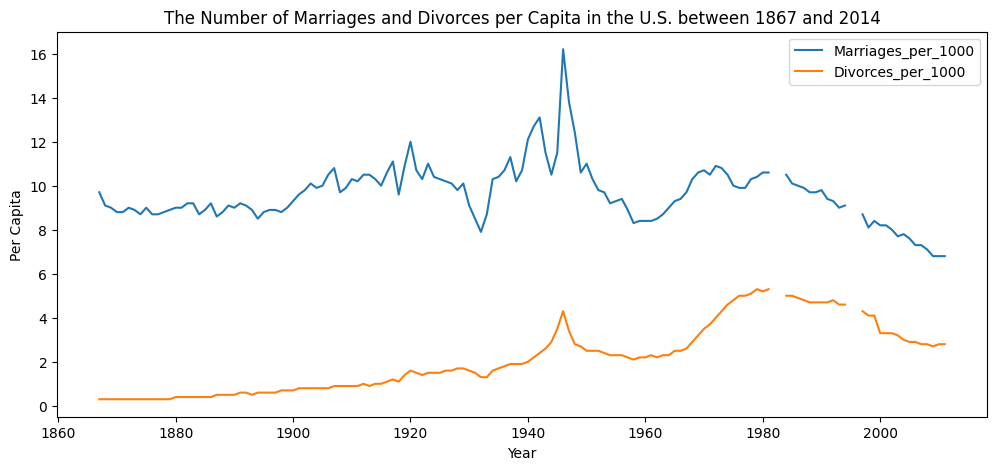

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
data_year = pd.DataFrame(data,columns=['Year'])
data_comp = pd.DataFrame(data,columns=['Marriages_per_1000','Divorces_per_1000']) 
fig, ax = plt.subplots(figsize=(12, 5))
for column in data_comp:
    ax.plot(data['Year'], data_comp[column])
ax.set_title('The Number of Marriages and Divorces per Capita in the U.S. between 1867 and 2014')
ax.legend(data_comp)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.show()

# QUESTION 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

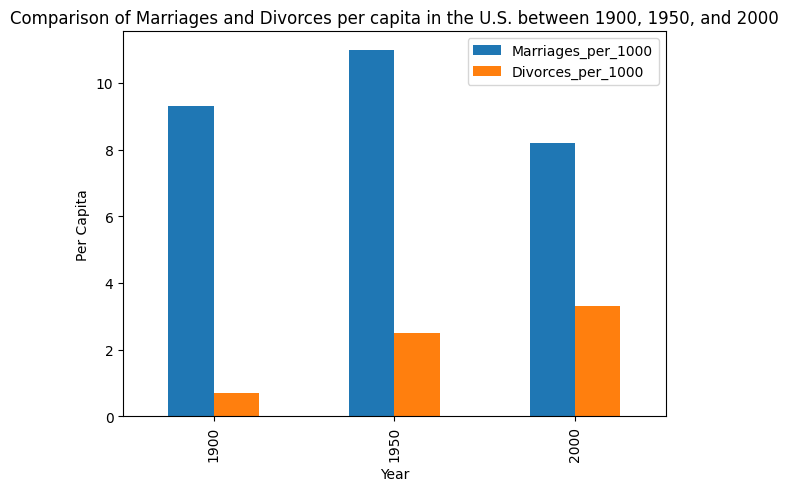

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
a=pd.DataFrame(data.loc[(data['Year'] == 1900)])
b=pd.DataFrame(data.loc[(data['Year'] == 1950)])
c=pd.DataFrame(data.loc[(data['Year'] == 2000)])
final = pd.concat([a, b, c])
plt.rcParams["figure.figsize"] = (7, 5)
final.plot(x="Year", y=["Marriages_per_1000", "Divorces_per_1000"], kind="bar")
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Comparison of Marriages and Divorces per capita in the U.S. between 1900, 1950, and 2000')
plt.show()

# QUESTION 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

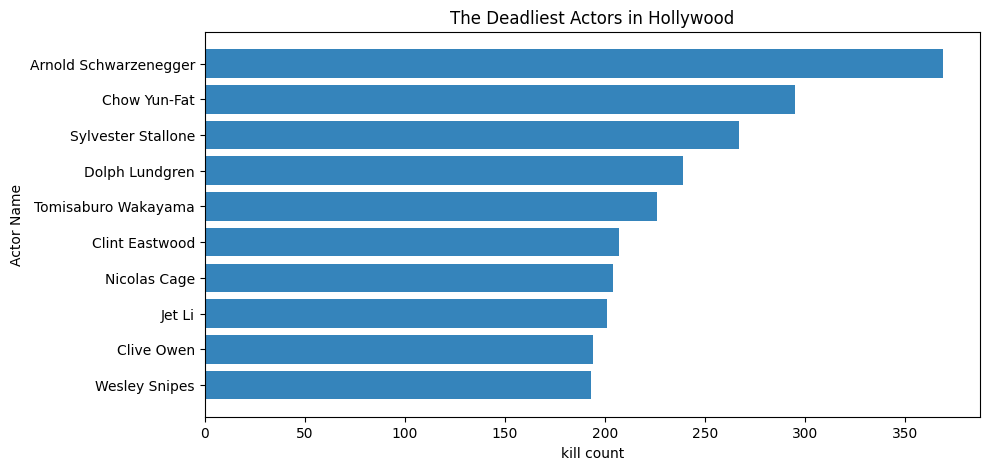

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('actor_kill_counts.csv')
data.sort_values(by=['Count'], inplace=True)
data_actor = data['Actor']
data_count = data['Count']
plt.rcParams["figure.figsize"] = (10, 5)
plt.barh(data_actor, data_count, align='center', alpha=0.9)
plt.xlabel('kill count')
plt.ylabel('Actor Name')
plt.title('The Deadliest Actors in Hollywood')
plt.show()

# QUESTION 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

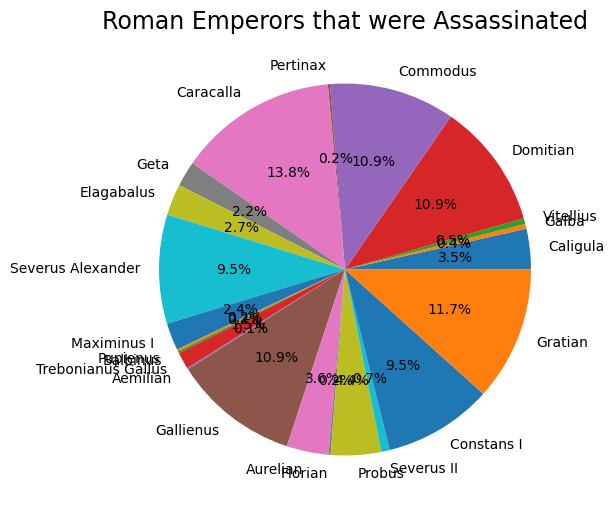

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('roman-emperor-reigns.csv')
data_cause=pd.DataFrame(data.loc[(data['Cause_of_Death'] == "Assassinated")])
my_labels = data_cause['Emperor']
fig, ax = plt.subplots()
ax.pie(data_cause["Length_of_Reign"],labels=my_labels,autopct='%1.1f%%',textprops={'fontsize': 10})
fig = plt.gcf()
fig.set_size_inches(6,8) 
plt.title('Roman Emperors that were Assassinated',fontsize=17)
plt.show()

# QUESTION 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

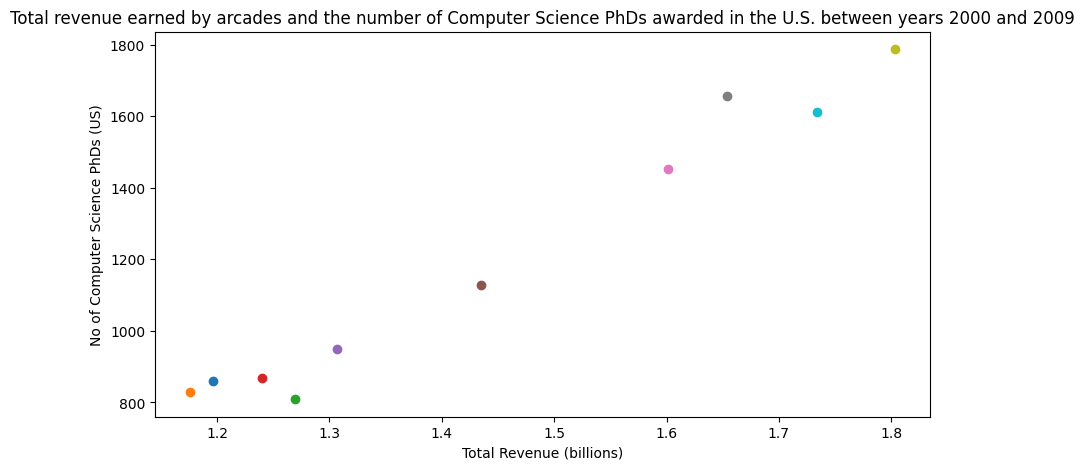

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(data['Year'])):
    ax.scatter(data['Total Arcade Revenue (billions)'][i], data['Computer Science Doctorates Awarded (US)'][i])
ax.set_title('Total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between years 2000 and 2009')
ax.set_xlabel('Total Revenue (billions)')
ax.set_ylabel('No of Computer Science PhDs (US)')
plt.show()